## What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?


## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use Matplotlib to create your plots.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.

In [55]:
#import dependencies
import random
import os
import requests
import json
import datetime
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt

In [56]:
#get api key
api_key = os.environ["openweather_key"]

In [57]:
#define variables
weather_lst = []
city_lst = []

In [58]:
#function to get closest city from latitude & longitude
def get_city(lat,long):
    city = citipy.nearest_city(lat, long)
    return city

In [59]:
#function to query openweather api to get weather for city
def get_weather(city):
    params = {
        "appid": api_key,
        "q": city
    }
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    return requests.get(base_url, params=params).json()

In [60]:
#loop as many times as required city count
while len(city_lst) < 60:
    
    #generate latitudes & longitudes randomly
    lat = random.uniform(-90,90)
    long = random.uniform(-180,180)
    
    #get closest city
    city_obj = get_city(lat,long)
    city = city_obj.city_name
    country_code = city_obj.country_code
    
    #make sure that cities are not repeated
    if city not in city_lst:

        city_lst.append(city)
        
        #get weather for city in JSON format
        response = get_weather(city)

        try:
            print(f"Getting weather for {city}, {country_code}")
            #extract weather parameters from JSON object
            max_temp = (response["main"]["temp_max"] - 273)*9/5  + 32
            humidity = response["main"]["humidity"]
            cloudiness = response["clouds"]["all"]
            windspeed = response["wind"]["speed"]
            date = datetime.datetime.fromtimestamp(int(response["dt"])).strftime('%Y-%m-%d %H:%M:%S')
            
        except KeyError:
            print(f"Weather data not found for {city}.Moving on to next city")

        #create a dataframe with above data
        weather_lst.append({"city": city,
                            "country code" : country_code,
                            "latitude": lat,
                            "longitude": long,
                            "date": date,
                            "Max temperature(F)": max_temp,
                            "humidity(%)" : humidity,
                            "cloudiness(%)" : cloudiness,
                            "windspeed(mph)" : windspeed

                            })
    

Getting weather for olinda, br
Getting weather for punta arenas, cl
Getting weather for fairbanks, us
Getting weather for isangel, vu
Getting weather for busselton, au
Getting weather for jamestown, sh
Getting weather for cidreira, br
Getting weather for srandakan, id
Getting weather for bluff, nz
Getting weather for tari, pg
Weather data not found for tari.Moving on to next city
Getting weather for ushuaia, ar
Getting weather for rorvik, no
Getting weather for cotonou, bj
Getting weather for piranshahr, ir
Getting weather for kapaa, us
Getting weather for aviles, es
Getting weather for mahebourg, mu
Getting weather for saskylakh, ru
Getting weather for tsihombe, mg
Getting weather for yuanping, cn
Getting weather for vao, nc
Getting weather for faanui, pf
Getting weather for esperance, au
Getting weather for georgetown, sh
Getting weather for mehamn, no
Getting weather for hilo, us
Getting weather for jingdezhen, cn
Getting weather for puerto ayora, ec
Getting weather for xining, cn
G

In [61]:
weather_df = pd.DataFrame(weather_lst)
weather_df

,Max temperature(F),city,cloudiness(%),country code,date,humidity(%),latitude,longitude,windspeed(mph)
0,75.4700,olinda,40,br,2017-11-19 02:00:00,88,-9.523871,-27.257860,1.00
1,34.0700,punta arenas,20,cl,2017-11-19 01:00:00,80,-86.589952,-122.835978,7.20
2,-23.5300,fairbanks,1,us,2017-11-19 01:18:00,74,63.511738,-144.385022,3.96
3,75.8174,isangel,100,vu,2017-11-19 01:57:00,100,-21.314737,172.298525,3.76
4,65.3324,busselton,0,au,2017-11-19 01:57:00,100,-80.243019,81.760073,3.86
5,43.0700,jamestown,90,sh,2017-11-19 01:24:00,93,-12.103189,1.429835,9.80
6,55.7024,cidreira,0,br,2017-11-19 01:57:01,90,-43.914278,-34.880430,3.56
7,77.0774,srandakan,92,id,2017-11-19 01:57:02,100,-10.825872,109.174370,2.06
8,55.3874,bluff,92,nz,2017-11-19 01:57:02,98,-59.391025,169.051087,5.26
9,55.3874,tari,92,pg,2017-11-19 01:57:02,98,-5.521247,142.708876,5.26


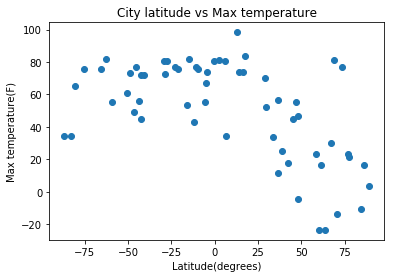

In [62]:
#Latitude vs Max Temperature(F) scatter plot
plt.scatter (weather_df["latitude"], weather_df["Max temperature(F)"])

plt.xlabel("Latitude(degrees)")
plt.ylabel("Max temperature(F)")
plt.title("City latitude vs Max temperature")

plt.show()

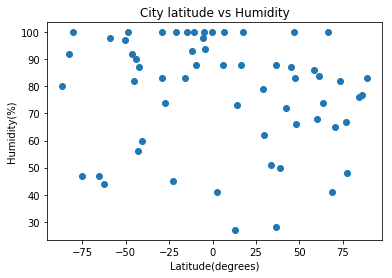

In [63]:
#Latitude vs humidity scatter plot
plt.scatter (weather_df["latitude"], weather_df["humidity(%)"])

plt.xlabel("Latitude(degrees)")
plt.ylabel("Humidity(%)")
plt.title("City latitude vs Humidity")

plt.show()

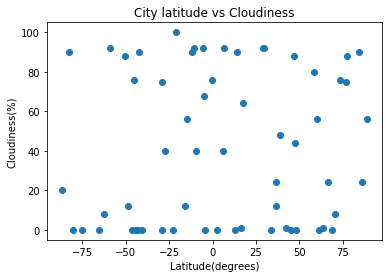

In [64]:
#Latitude vs cloudiness scatter plot
plt.scatter (weather_df["latitude"], weather_df["cloudiness(%)"])

plt.xlabel("Latitude(degrees)")
plt.ylabel("Cloudiness(%)")
plt.title("City latitude vs Cloudiness")

plt.show()

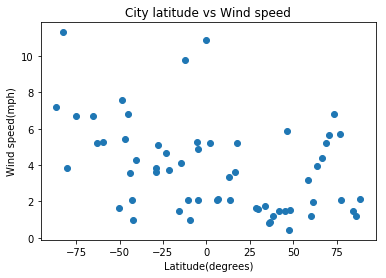

In [65]:
#Latitude vs wind-speed scatter plot
plt.scatter (weather_df["latitude"], weather_df["windspeed(mph)"])

plt.xlabel("Latitude(degrees)")
plt.ylabel("Wind speed(mph)")
plt.title("City latitude vs Wind speed")

plt.show()